In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

In [2]:
with open("bits-i7-8550U.json", "r") as fp:
    js = json.load(fp)

data = pd.DataFrame(js['benchmarks'])
data["algo"] = data["name"].apply(lambda x: re.split("[_<>\/]", x)[1])
data["D"] = data["name"].apply(lambda x: int(re.split("[_<>\/]", x)[2]))
data["target"] = data["name"].apply(lambda x: int(re.split("[_<>\/]", x)[4]))

data["x"] = data.target.max() * (data.D - 1) + data.target


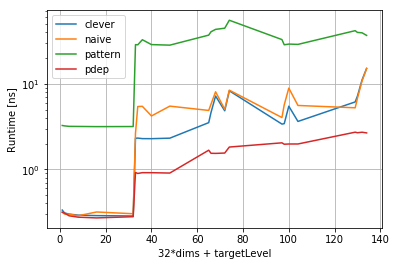

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

for algo, view in data.groupby("algo"):
    plt.plot(view.x, view.real_time, label=algo)

plt.grid()
plt.semilogy()
plt.legend()
plt.ylabel("Runtime [ns]")
plt.xlabel("32*dims + targetLevel")

plt.show()

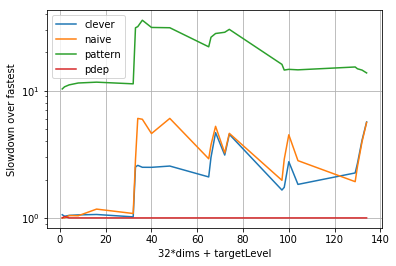

In [4]:
fastest = {}
mins = data.groupby("x").real_time.min()
for i, m in zip(mins.index, mins):
    fastest[i] = m

data["slowdown"] = data.real_time
for i, row in data.iterrows():
    data.at[i, 'slowdown'] = row.slowdown / fastest[row.x]
    
fig = plt.figure()
ax = fig.add_subplot(111)

for algo, view in data.groupby("algo"):
    plt.plot(view.x, view.slowdown, label=algo)

plt.grid()
plt.semilogy()
plt.legend()
plt.ylabel("Slowdown over fastest")
plt.xlabel("32*dims + targetLevel")

plt.show()